<a href="https://colab.research.google.com/github/ewuerfel66/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra Sprint Challenge

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statistics import mean, variance, stdev

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

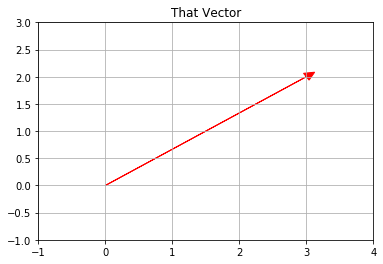

In [170]:
# As far as graphing goes, accessing the elements of a list is easier
# so let's write our vector as a list.
a = [3, 2]

# Create the plot
plt.arrow(0, 0, a[0], a[1], head_width = 0.15, head_length = 0.15, color = 'red')
plt.xlim(-1, 4)
plt.ylim(-1, 3)

plt.title('That Vector')
plt.grid()
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [171]:
# It's still easier to use lists
b = [17, -4, -2, 1]

norm = np.sqrt(sum([x**2 for x in b]))
print('The norm of the vector is: ', norm)

The norm of the vector is:  17.60681686165901


The norm of a vector represents its magnitude. In Euclidean space this can be thought of as the vector's length.

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [172]:
c = np.array([3, 7, -2, 1])
d = np.array([9, -7, 4, 6])

print('These vectors are NOT orthogonal since their dot product is:', np.dot(c, d), 
     'which is NOT equal to 0.')

These vectors are NOT orthogonal since their dot product is: -24 which is NOT equal to 0.


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
# Enter Matrix E
E = np.array([[7, 4, 2],
              [1, 3, -1],
              [2, 6, -4]])

In [174]:
# Find the inverse of E
E_inv = np.linalg.inv(E)
print(E_inv)

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


In [175]:
# We can check by multiplying E with it's inverse
print(np.matmul(E, E_inv))

[[ 1.00000000e+00  4.44089210e-16  0.00000000e+00]
 [ 3.46944695e-17  1.00000000e+00  1.11022302e-16]
 [ 6.93889390e-17 -4.44089210e-16  1.00000000e+00]]


The inverse looks good

In [176]:
# Find the Transpose
E_T = E.T
print(E_T)

[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [177]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [178]:
# Customers - I'm going to round mean and stdev since they have units of 'People'
# Variance has units of 'People-squared' which doesn't make sense anyways, so leave it as is
print('Mean amount of Customers:', round(mean(df['customers'])))
print('Variance of Customers:', variance(df['customers']))
print('Standard Deviation of Customers:', round(stdev(df['customers'])))

Mean amount of Customers: 1136
Variance of Customers: 98761.90476190476
Standard Deviation of Customers: 314


In [179]:
# Snowfall
print('Mean amount of Snowfall in inches:', mean(df['snow']))
print('Variance of Snowfall:', variance(df['snow']))
print('Standard Deviation of Snowfall in inches:', stdev(df['snow']))

Mean amount of Snowfall in inches: 2.7142857142857144
Variance of Snowfall: 8.571428571428571
Standard Deviation of Snowfall in inches: 2.9277002188455996


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

The variances are NOT comparable because Customers and Snowfall exist on very different scales. The Standard Deviations of Customers and Snowfall ARE comparable though because they have been Standardized.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [180]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


The entries on the main diagonal show the variance. All other entries show the covariance between Customers and Snowfall.

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [181]:
# Let me get you some data to start you off.

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic_Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic_Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
# We can't do PCA on non-numeric data
features = ["Cheese", "Carcass_Meat", "Other_Meat",
            "Fish", "Fats_and_Oils", "Sugars",
            "Fresh_Potatoes", "Fresh_Veg", "Other_Veg",
            "Processed_Potatoes", "Processed_Veg", "Fresh_Fruit",
            "Cereals", "Beverages", "Soft_Drinks",
            "Alcoholic_Drinks", "Confectionery"]

In [183]:
# Get the data Standardized . . .
x = df.loc[:,features].values
x = StandardScaler().fit_transform(x)

# . . . and throw it into a DataFrame
PCdf = pd.DataFrame(data = x, columns = features)
PCdf.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic_Drinks,Confectionery
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
pca = PCA(n_components=2)

In [0]:
PCs = pca.fit_transform(x)

In [186]:
# Enter the Primary Component data into a DataFrame
PCdf = pd.DataFrame(data = PCs, columns = ['PC 1', 'PC 2'])
PCdf.head()

,PC 1,PC 2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


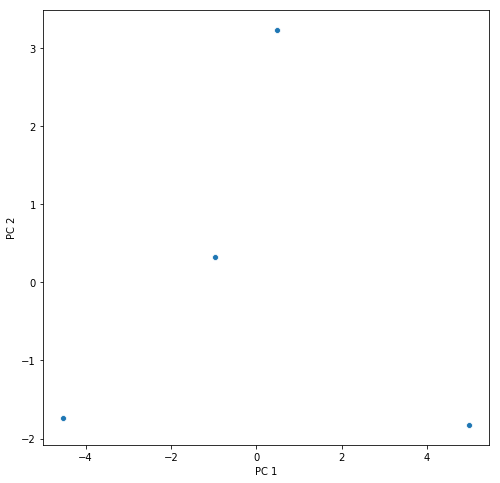

In [187]:
# Plot PC 2 as a function of PC 1
fig = plt.figure(figsize=(8,8))
sns.scatterplot(PCdf['PC 1'], PCdf['PC 2']);

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [188]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


Let's make an elbow graph to see how many cluster we should make

In [0]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

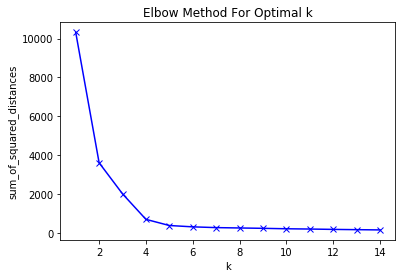

In [190]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### k = 4

In [0]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
labels = kmeans.labels_
points['4k_labels'] = labels

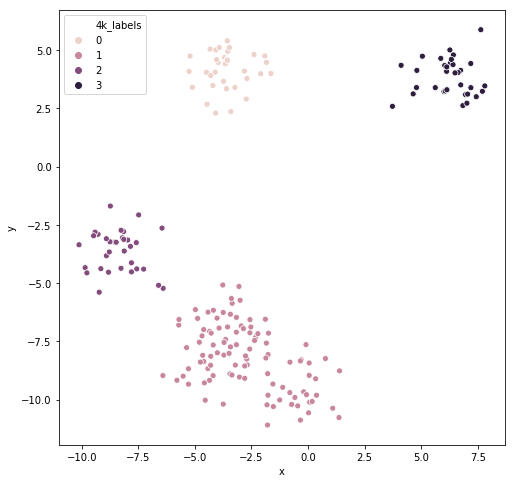

In [192]:
import seaborn as sns

fig = plt.figure(figsize=(8,8))
sns.scatterplot(points['x'], points['y'], hue=points['4k_labels']);